In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mg
%matplotlib inline

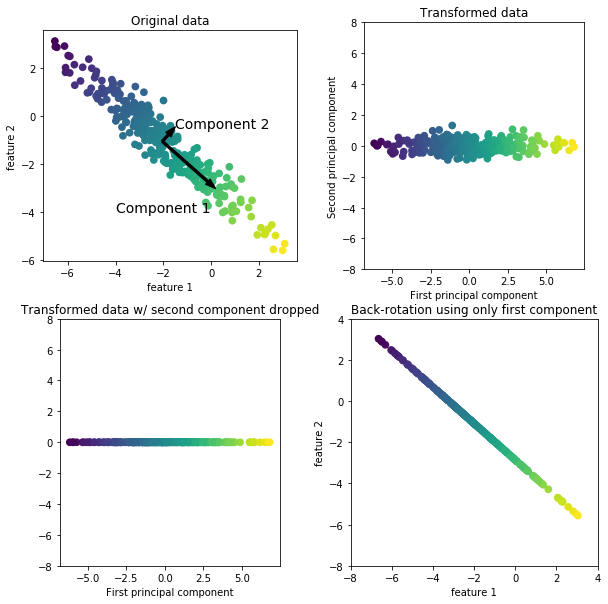

In [2]:
mg.plots.plot_pca_illustration()

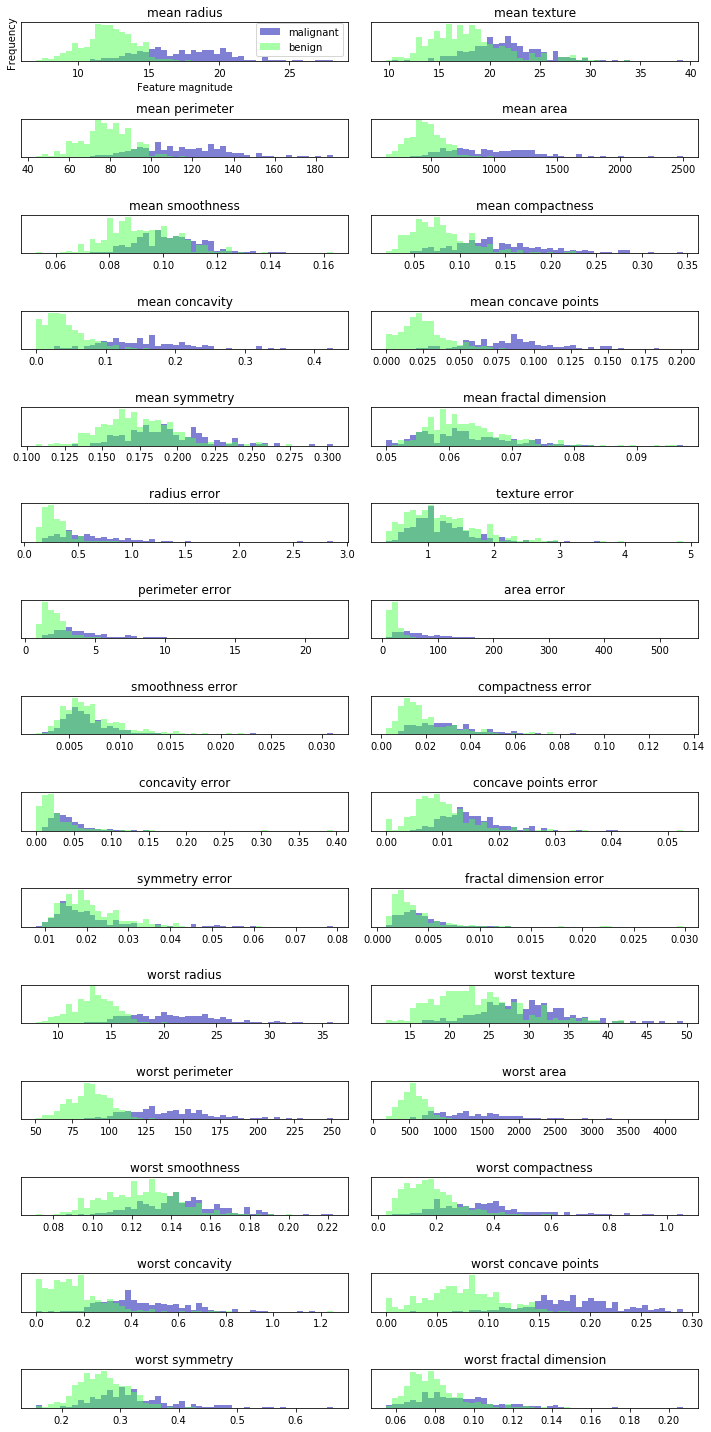

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mg.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mg.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


Text(0, 0.5, 'Second principal component')

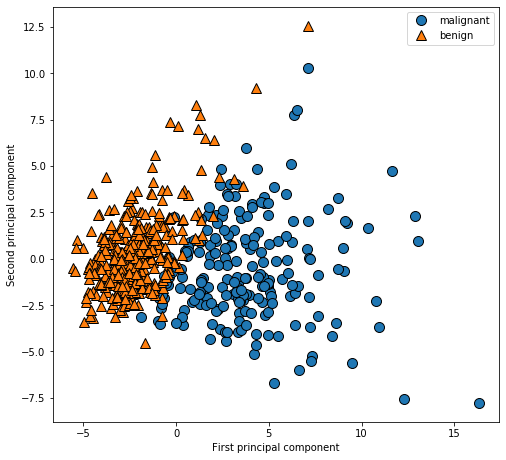

In [6]:
plt.figure(figsize=(8,8))
mg.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [7]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(2, 30)


In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

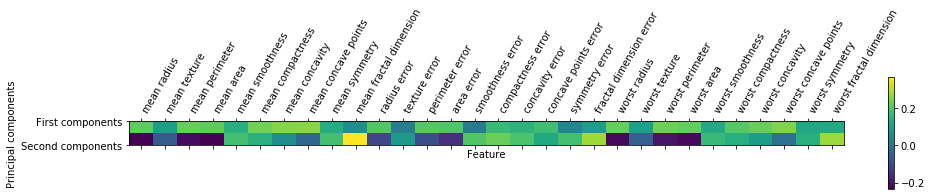

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First components", "Second components"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

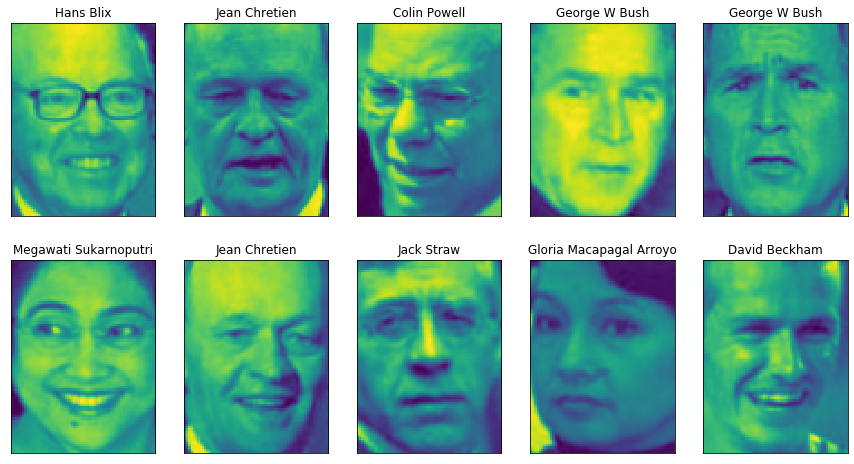

In [10]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={"xticks":(), "yticks":()})
for target, image,ax, in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print("people.image.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

people.image.shape:(2769, 87, 65)
Number of classes:53


In [12]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts ,people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='  ')
    if(i + 1) % 3 == 0:
        print()

Alejandro Toledo          39  Alvaro Uribe              35  Amelie Mauresmo           21  
Andre Agassi              36  Ariel Sharon              77  Arnold Schwarzenegger     42  
Atal Bihari Vajpayee      24  Bill Clinton              29  Carlos Menem              21  
Colin Powell             236  David Beckham             31  Donald Rumsfeld          121  
George Robertson          22  George W Bush            530  Gerhard Schroeder        109  
Gloria Macapagal Arroyo   44  Gray Davis                26  Hamid Karzai              22  
Hans Blix                 39  Hugo Chavez               71  Igor Ivanov               20  
Jack Straw                28  Jacques Chirac            52  Jean Chretien             55  
Jennifer Aniston          21  Jennifer Capriati         42  Jennifer Lopez            21  
Jeremy Greenstock         24  Jiang Zemin               20  John Ashcroft             53  
John Negroponte           31  Juan Carlos Ferrero       28  Junichiro Koizumi         60  

In [13]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn:0.27


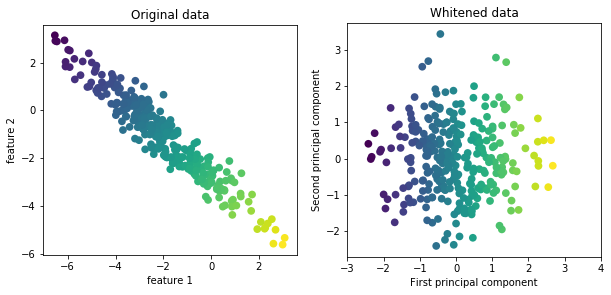

In [15]:
mg.plots.plot_pca_whitening()

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca_shape:{}".format(X_train_pca.shape))

X_train_pca_shape:(1356, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set acucuracy:{:.2f}".format(knn.score(X_test_pca, y_test)))

Test set acucuracy:0.35


In [18]:
print("pca components_.shape:{}".format(pca.components_.shape))

pca components_.shape:(100, 5655)


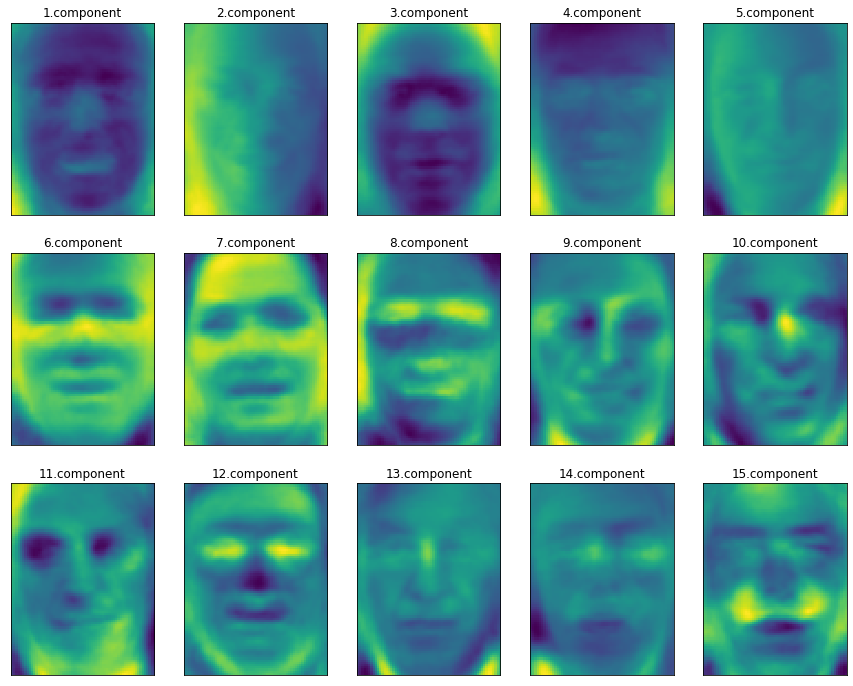

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={"xticks":(), "yticks":()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}.component".format((i + 1)))

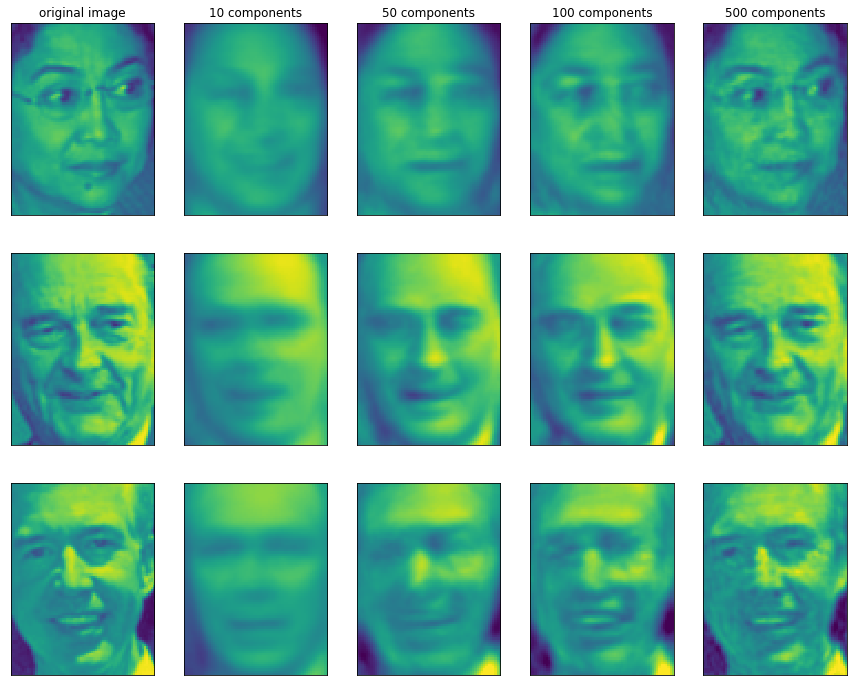

In [20]:
mg.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal componet')

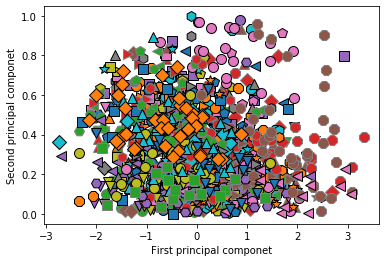

In [21]:
mg.discrete_scatter(X_train_pca[:, 0], X_train[:, 1], y_train)
plt.xlabel(("First principal componet"))
plt.ylabel(("Second principal componet"))

#### 非負値行列因子分解（NMF）
* 非負値行列因子分解とは、有用な特徴量を抽出することを目的とする教師なし学習
* アルゴリズムの動作はPCAと似ている。（次元削減）
* PCAでは個々のデータポイントをいくつかの成分の重みづけ和として表現
* 係数と成分が非負であること、つまり成分と係数が常にゼロ以上であることが求められる。
* 複数人が話している音声データや多数の楽器からなる音楽に有効。
* 先程の画像データだと正と負の部分がある。

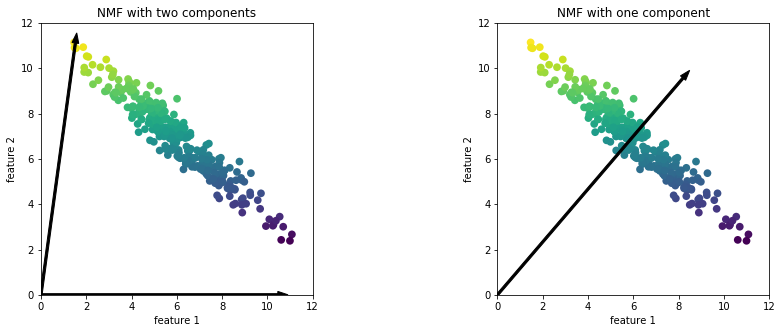

In [22]:
mg.plots.plot_nmf_illustration()

In [23]:
# mg.plots.plot_nmf_faces(X_train, X_test, image_shape)

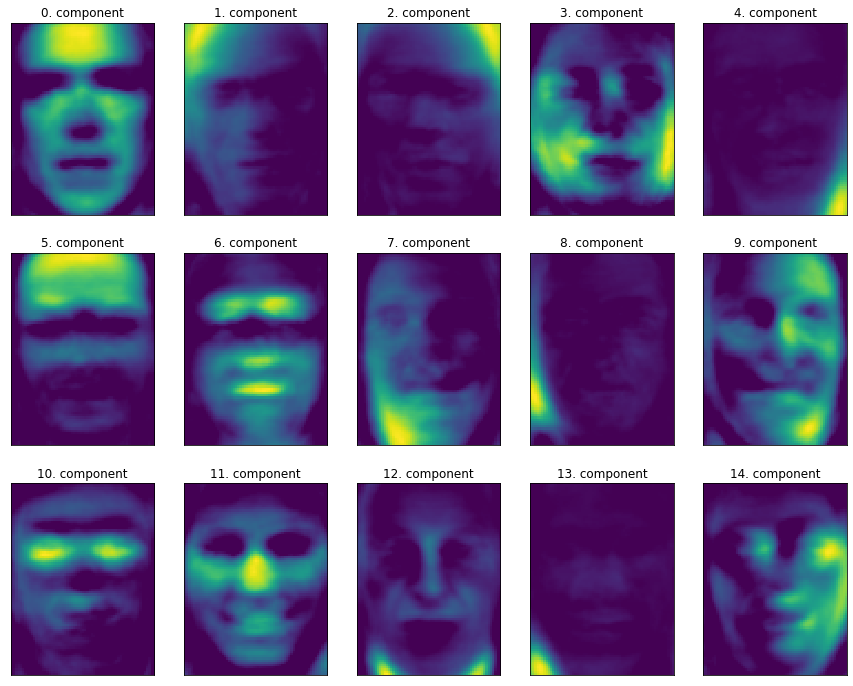

In [24]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

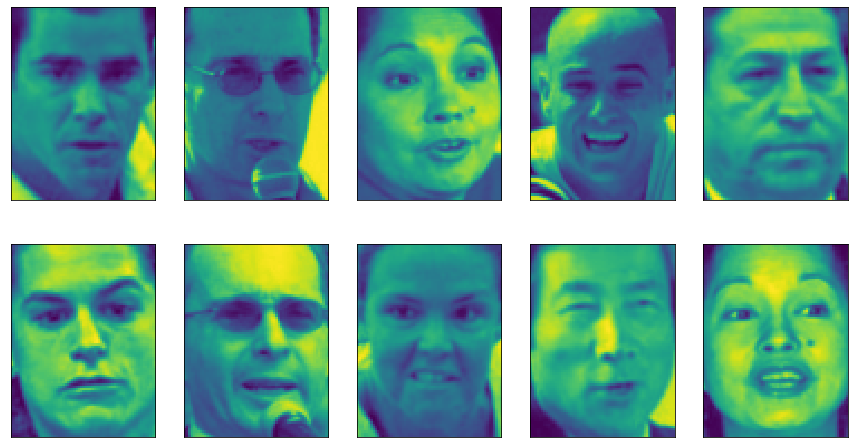

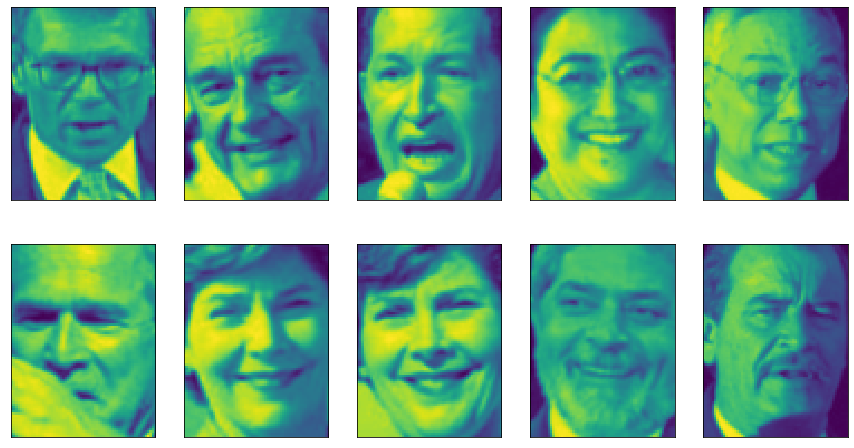

In [25]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i , (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
    
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i , (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))    


Text(0, 0.5, 'Signal')

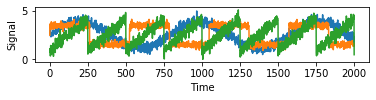

In [26]:
S = mg.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [27]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements:{}".format(X.shape))


Shape of measurements:(2000, 100)


In [28]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape:{}".format(S_.shape))

Recovered signal shape:(2000, 3)


In [29]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

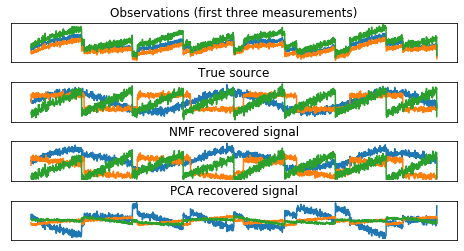

In [30]:
models = [X, S, S_, H]
names = ["Observations (first three measurements)", 
        "True source",
        "NMF recovered signal",
        "PCA recovered signal"]
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

#### t-SNEについて
* 多様体学習アルゴリズム：可視化によく用いられる。はるかに複雑なマッピングを行い、それが**t-SNE**
* 3以上の新しい特徴量を生成することはない
* 訓練データの新たな表現を計算することはあるが、新しいデータを変換することはない
* 探索的データの解析に有効だが、最終目標が教師あり学習の際には用いられない。

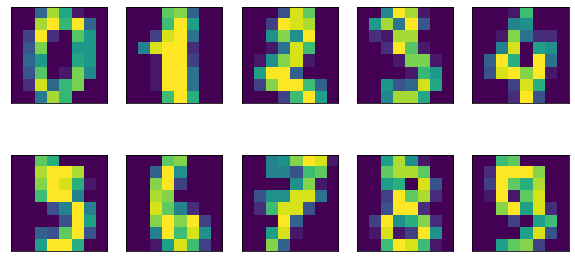

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


Text(0, 0.5, 'Second princinpal component')

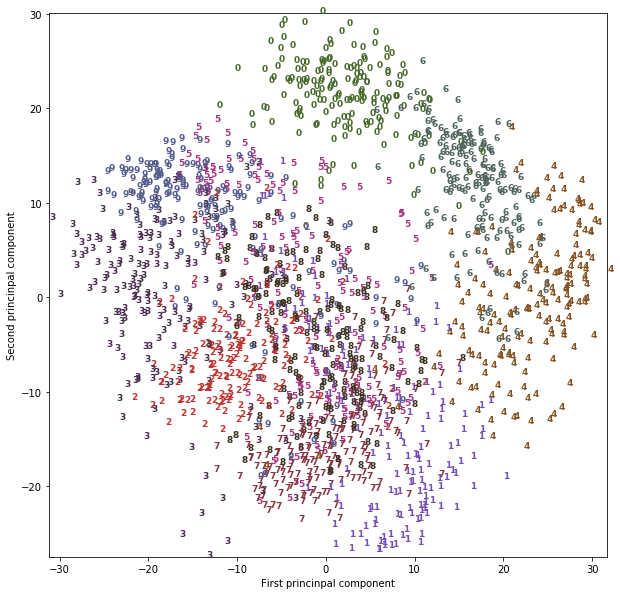

In [36]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            fontdict = {"weight": "bold", 'size': 9},
            color = colors[digits.target[i]])
plt.xlabel("First princinpal component")
plt.ylabel("Second princinpal component")

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

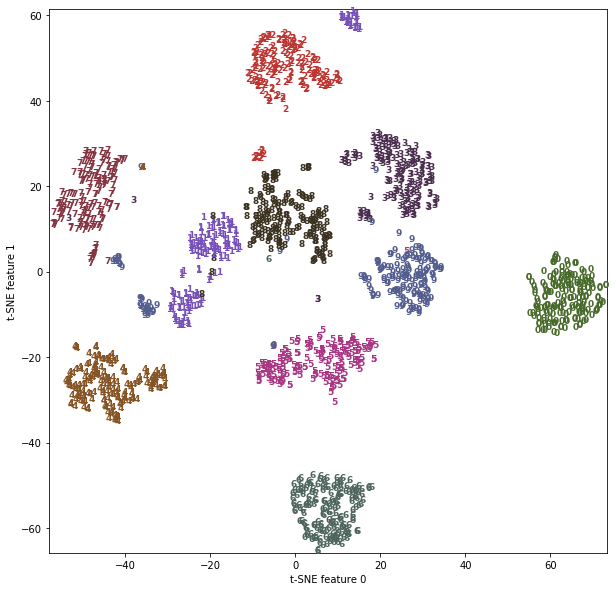

In [39]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight': "bold", "size":9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")